# Adding Random Gaussian Noise - multiple folders
- Nifti파일을 불러온 후, Gaussian noise를 더하여 저장함
- MRI의 경우 intensity가 상대적이므로 ROI의 standard deviation을 기준으로 Noise를 더하게 하였음
- Npow의 값을 조절하여 noise level을 결정함
- imgname_new에 새로 저장될 노이즈가 추가된 영상파일의 이름을 지정함

In [1]:
!pip install nibabel

In [2]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "/content/drive/My Drive/mary/jjy/radiomics/"
imgname = "T2.nii.gz"
segname = "seg2.nii.gz"

# 새로 저장할 noise가 추가된 영상파일의 이름
imgname_new = "T2_noisy.nii.gz"

In [4]:
Input_folder = os.listdir(path)
patient_id = []
print("I found below folders:")
for i in range(0,len(Input_folder)):
  if os.path.isdir(path+Input_folder[i]):
    print(Input_folder[i])
    patient_id.append(Input_folder[i])

I found below folders:
p0001
p0002


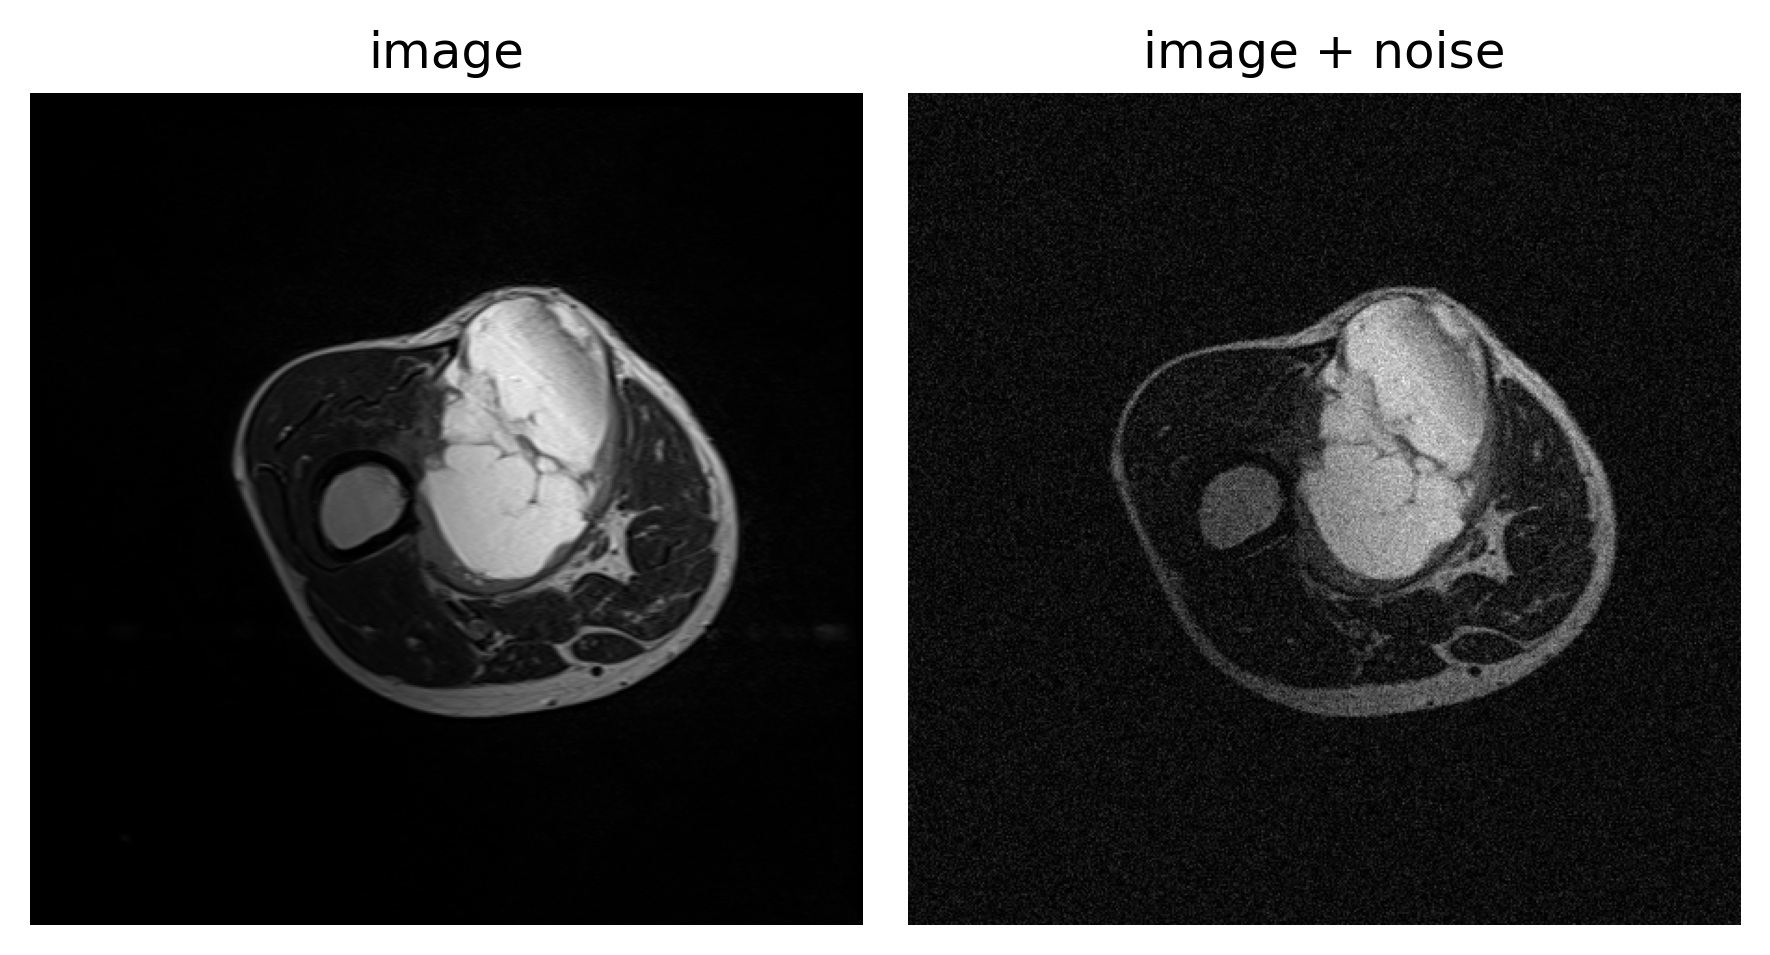

In [6]:
Npow = 0.5  # 추가할 노이즈의 정도를 결정

imgf = nib.load(path+patient_id[0]+'/'+imgname)

# segmentation을 이용하지 않는 경우 아래 세 줄을 지우고, 네 번째 줄의 주석을 제거하고 roistd값을 수동으로 변경
segf = nib.load(path+patient_id[0]+'/'+segname)
seg = segf.get_fdata()
roistd = np.std(img[seg==1])
#roistd = 100

img = imgf.get_fdata()
zc = int(img.shape[-1]/2)

Nstd = Npow * roistd
imgn = (np.abs(img + np.random.normal(0,Nstd,img.shape))).astype(img.dtype)

plt.figure(dpi=300)
plt.subplot(121)
plt.imshow(img[:,:,zc],cmap='gray')
plt.title('image')
plt.axis('off')
plt.subplot(122)
plt.imshow(imgn[:,:,zc],cmap='gray')
plt.title('image + noise')
plt.axis('off')
plt.tight_layout()
plt.show()

patient id:  p0001


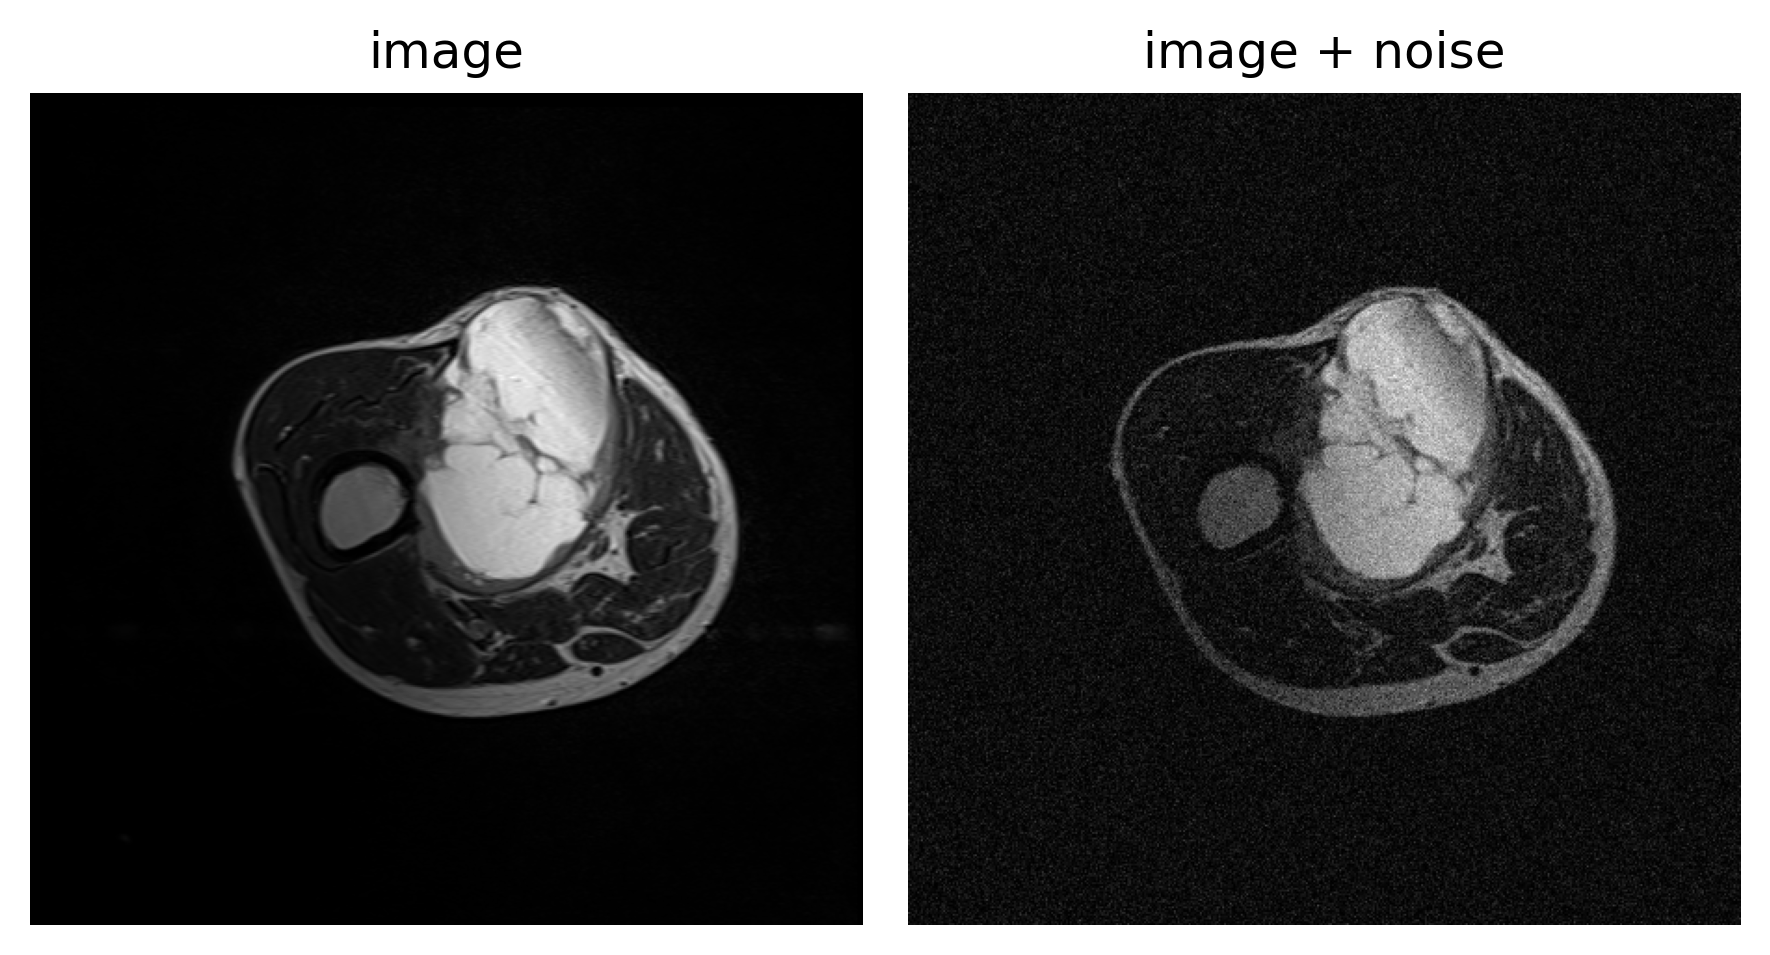

patient id:  p0002


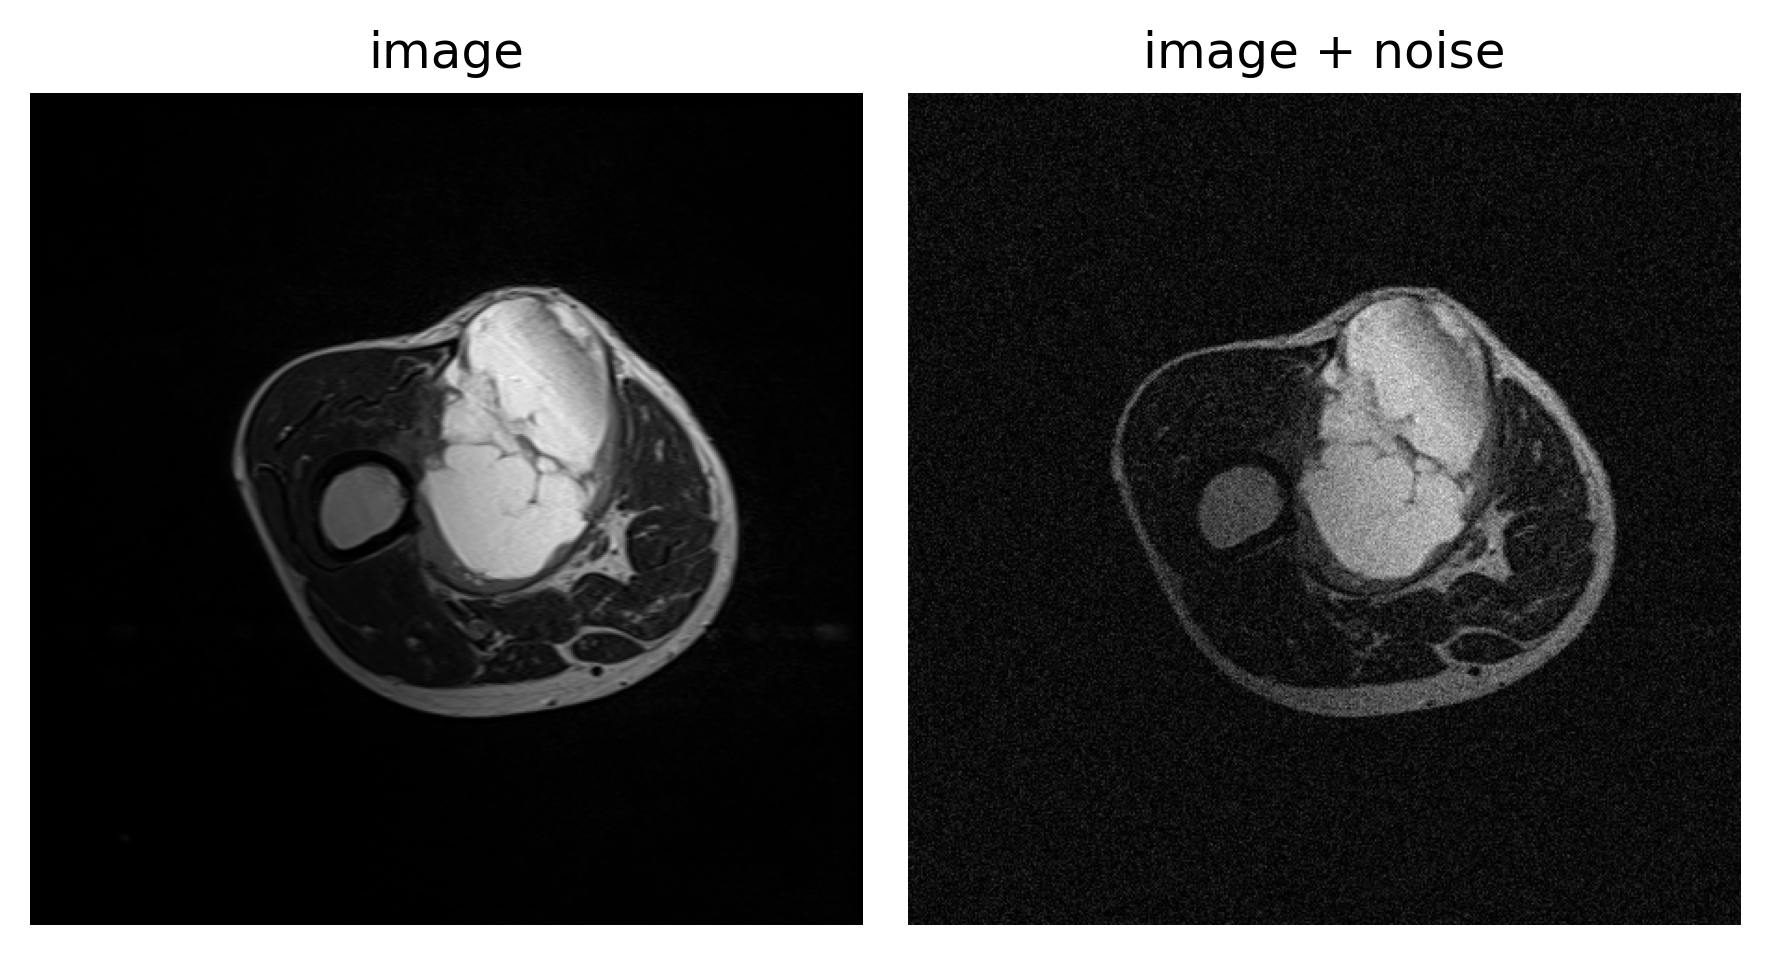

In [8]:
for i in range(0,len(patient_id)):
  print('patient id: ',patient_id[i])

  imgf = nib.load(path+patient_id[i]+'/'+imgname)
  segf = nib.load(path+patient_id[i]+'/'+segname)

  img = imgf.get_fdata()
  seg = segf.get_fdata()
  zc = int(img.shape[-1]/2)
  roistd = np.std(img[seg==1])
  img.dtype

  Nstd = Npow * roistd
  imgn = (np.abs(img + np.random.normal(0,Nstd,img.shape))).astype(img.dtype)

  plt.figure(dpi=300)
  plt.subplot(121)
  plt.imshow(img[:,:,zc],cmap='gray')
  plt.title('image')
  plt.axis('off')
  plt.subplot(122)
  plt.imshow(imgn[:,:,zc],cmap='gray')
  plt.title('image + noise')
  plt.axis('off')
  plt.tight_layout()
  plt.show()
  
  img_new=nib.Nifti1Image(imgn,imgf.affine,imgf.header)
  nib.save(img_new,path+patient_id[i]+'/'+imgname_new)
